In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/national-basketball-association-nba/nba-players.csv


**Overview**

The data consists of performance statistics from NBA players. There are 1,341 observations, and each observation in the data represents a different player in the NBA. The target variable is a Boolean value that indicates whether a given player will last in the league for five years.

A firm that provides insights for management and coaches in the National Basketball Association (NBA) is interested in retaining players who can last in the high-pressure environment of professional basketball and help the team be successful over time. 

**Business Proposal**

My job is to help NBA managers and coaches identify which players are most likely to thrive in such a high-pressure, competitive enviroment that is the NBA. To do this succesfully, I will analyze the dataset of NBA players and their performance records, conduct feature engineering to determine which features will most effectively predict whether a player’s NBA career will last at least five years, and then use those insights to build a Naive Bayes model to make predictions on my target variable. 

**Naive Bayes Model**

A Naive Bayes model could be a strong choice for predicting NBA player longevity due to its simplicity, efficiency, and effectiveness in binary classification tasks. With a dataset containing 1,341 observations, Naive Bayes can handle moderate-sized datasets well. Additionally, its assumption of feature independence, though simplistic, may hold for certain performance metrics like player age, minutes played, and field goal percentage. Given the binary nature of the prediction task (lasting at least five years or not), Naive Bayes' suitability for binary classification further supports its application. Moreover, its ability to perform well with limited training data aligns with the dataset size

In [2]:
# Import necessary libraries and pacakages
import pandas as pd
import numpy as np

from sklearn import naive_bayes
from sklearn import model_selection
from sklearn.model_selection import train_test_split
from sklearn import metrics

from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Load in the dataset
nba= pd.read_csv('/kaggle/input/national-basketball-association-nba/nba-players.csv')

In [4]:
# View data
nba.head(10)

,Unnamed: 0,name,gp,min,pts,fgm,fga,fg,3p_made,3pa,...,fta,ft,oreb,dreb,reb,ast,stl,blk,tov,target_5yrs
0,0,Brandon Ingram,36,27.4,7.4,2.6,7.6,34.7,0.5,2.1,...,2.3,69.9,0.7,3.4,4.1,1.9,0.4,0.4,1.3,0
1,1,Andrew Harrison,35,26.9,7.2,2.0,6.7,29.6,0.7,2.8,...,3.4,76.5,0.5,2.0,2.4,3.7,1.1,0.5,1.6,0
2,2,JaKarr Sampson,74,15.3,5.2,2.0,4.7,42.2,0.4,1.7,...,1.3,67.0,0.5,1.7,2.2,1.0,0.5,0.3,1.0,0
3,3,Malik Sealy,58,11.6,5.7,2.3,5.5,42.6,0.1,0.5,...,1.3,68.9,1.0,0.9,1.9,0.8,0.6,0.1,1.0,1
4,4,Matt Geiger,48,11.5,4.5,1.6,3.0,52.4,0.0,0.1,...,1.9,67.4,1.0,1.5,2.5,0.3,0.3,0.4,0.8,1
5,5,Tony Bennett,75,11.4,3.7,1.5,3.5,42.3,0.3,1.1,...,0.5,73.2,0.2,0.7,0.8,1.8,0.4,0.0,0.7,0
6,6,Don MacLean,62,10.9,6.6,2.5,5.8,43.5,0.0,0.1,...,1.8,81.1,0.5,1.4,2.0,0.6,0.2,0.1,0.7,1
7,7,Tracy Murray,48,10.3,5.7,2.3,5.4,41.5,0.4,1.5,...,0.8,87.5,0.8,0.9,1.7,0.2,0.2,0.1,0.7,1
8,8,Duane Cooper,65,9.9,2.4,1.0,2.4,39.2,0.1,0.5,...,0.5,71.4,0.2,0.6,0.8,2.3,0.3,0.0,1.1,0
9,9,Dave Johnson,42,8.5,3.7,1.4,3.5,38.3,0.1,0.3,...,1.4,67.8,0.4,0.7,1.1,0.3,0.2,0.0,0.7,0


In [5]:
# View shape
nba.shape

(1340, 22)

In [6]:
# View column names
nba.columns

Index(['Unnamed: 0', 'name', 'gp', 'min', 'pts', 'fgm', 'fga', 'fg', '3p_made',
       '3pa', '3p', 'ftm', 'fta', 'ft', 'oreb', 'dreb', 'reb', 'ast', 'stl',
       'blk', 'tov', 'target_5yrs'],
      dtype='object')

In [7]:
# Summary of data
nba.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1340 entries, 0 to 1339
Data columns (total 22 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   1340 non-null   int64  
 1   name         1340 non-null   object 
 2   gp           1340 non-null   int64  
 3   min          1340 non-null   float64
 4   pts          1340 non-null   float64
 5   fgm          1340 non-null   float64
 6   fga          1340 non-null   float64
 7   fg           1340 non-null   float64
 8   3p_made      1340 non-null   float64
 9   3pa          1340 non-null   float64
 10  3p           1340 non-null   float64
 11  ftm          1340 non-null   float64
 12  fta          1340 non-null   float64
 13  ft           1340 non-null   float64
 14  oreb         1340 non-null   float64
 15  dreb         1340 non-null   float64
 16  reb          1340 non-null   float64
 17  ast          1340 non-null   float64
 18  stl          1340 non-null   float64
 19  blk   

In [8]:
# Check for missing values
nba.isnull().sum()

Unnamed: 0     0
name           0
gp             0
min            0
pts            0
fgm            0
fga            0
fg             0
3p_made        0
3pa            0
3p             0
ftm            0
fta            0
ft             0
oreb           0
dreb           0
reb            0
ast            0
stl            0
blk            0
tov            0
target_5yrs    0
dtype: int64

In [9]:
# Class balance
nba['target_5yrs'].value_counts(normalize= True) * 100

target_5yrs
1    62.014925
0    37.985075
Name: proportion, dtype: float64

**Class Balance**

About 62% of the values in the target column belong to class 1, and about 38% of the values
belong to class 0. In other words, about 62% of players represented by this data have an NBA career duration of at least five years, and about 38% do not.

The dataset is not perfectly balanced, but an exact 50-50 split is a rare occurance in datasets, and a 62-38 split is not too imbalanced. However, if the majority class made up 90% or more of thedataset, then that would be of concern, and it would be prudent to address that issue through techniques like upsampling and downsampling.

**Column Selection** 

The goal here is to identify features that will serve as useful predictors to the target variable.

The name column should be avoided as a feature. A player’s name is not helpful in determining their career duration. Moreover, it may not be ethical or fair to predict a player’s career duration based on a name.

The number of games a player has played in may not be as important in determining their career duration as the number of points they have earned. While you could say that someone who has played in more games may have more practice and experience, the points they earn during the games they played in would speak more to their performance as a player. This, in turn, would influence their career duration. So, the 'gp' column on its own may not be a helpful feature. However, 'gp' and 'pts' could be combined to get the total number of points earned across the games played, and that result could be a helpful feature.

If the number of points earned across games will be extracted as a feature, then that could be combined with the number of minutes played across games (min * gp) to extract another feature. This could be a measure of players’ efficiency and could help in predicting players’ career duration.

'min' on its own may not be useful as a feature for the same reason as 'gp'.

There are three different columns that give information about field goals. The percent of field goals a player makes (fg) says more about their performance than the number of field goals they make (fgm) or the number of field goals they attempt (fga). The percent gives more context, as it takes into account both how many field goals a player successfully made and how many field goals they attempted in total. This allows for a more meaningful comparison between players. The same logic applies to the percent of three-point field goals made, as well as the percent of free throws made.

There are columns for the number offensive rebounds (oreb), the number of defensive rebounds (dreb), and the number of rebounds overall (reb). Because the overall number of rebounds should already incorporate both offensive and defensive rebounds, it would make sense to use the overall as a feature.

The number of assists (ast), steals (stl), blocks (blk), and turnovers (tov) also provide information about how well players are performing in games, and thus, could be helpful in predicting how longplayers last in the league.

In [10]:
# Column selection
nba_data= nba[['gp', 'min', 'pts', 'fg', '3p', 'ft', 'reb', 'ast', 'stl', 'blk', 'tov', 'target_5yrs']]
nba_data.head(10)

,gp,min,pts,fg,3p,ft,reb,ast,stl,blk,tov,target_5yrs
0,36,27.4,7.4,34.7,25.0,69.9,4.1,1.9,0.4,0.4,1.3,0
1,35,26.9,7.2,29.6,23.5,76.5,2.4,3.7,1.1,0.5,1.6,0
2,74,15.3,5.2,42.2,24.4,67.0,2.2,1.0,0.5,0.3,1.0,0
3,58,11.6,5.7,42.6,22.6,68.9,1.9,0.8,0.6,0.1,1.0,1
4,48,11.5,4.5,52.4,0.0,67.4,2.5,0.3,0.3,0.4,0.8,1
5,75,11.4,3.7,42.3,32.5,73.2,0.8,1.8,0.4,0.0,0.7,0
6,62,10.9,6.6,43.5,50.0,81.1,2.0,0.6,0.2,0.1,0.7,1
7,48,10.3,5.7,41.5,30.0,87.5,1.7,0.2,0.2,0.1,0.7,1
8,65,9.9,2.4,39.2,23.3,71.4,0.8,2.3,0.3,0.0,1.1,0
9,42,8.5,3.7,38.3,21.4,67.8,1.1,0.3,0.2,0.0,0.7,0


**Feature Extraction**

The 'gp', 'pts' and 'min' columns lend themselves to feature extraction. 'gp' represents the total number of games a player has played in, and 'pts' represents the average number of points the player has earned per game. It might be helpful to combine these columns to get the total number of points the player has earned across the games and use the result as a new feature, which could be added to a new column named 'total_points'. The total points earned by a player can reflect their performance and shape their career longevity.

The 'min' column represents the average number of minutes played per game. 'total_points' could be combined with 'min' and 'gp' to extract a new feature: points earned per minute. This can be considered a measure of player efficiency, which could shape career duration. This feature can be added into a column named 'efficiency'. 

In [11]:
# Extract features to help predict target variable
ex_nba= nba_data.copy()

ex_nba['total_points']= ex_nba['gp'] * ex_nba['pts']

ex_nba['efficiency']= ex_nba['total_points'] / (ex_nba['min'] * ex_nba['gp'])

ex_nba.head(10)

,gp,min,pts,fg,3p,ft,reb,ast,stl,blk,tov,target_5yrs,total_points,efficiency
0,36,27.4,7.4,34.7,25.0,69.9,4.1,1.9,0.4,0.4,1.3,0,266.4,0.270073
1,35,26.9,7.2,29.6,23.5,76.5,2.4,3.7,1.1,0.5,1.6,0,252.0,0.267658
2,74,15.3,5.2,42.2,24.4,67.0,2.2,1.0,0.5,0.3,1.0,0,384.8,0.339869
3,58,11.6,5.7,42.6,22.6,68.9,1.9,0.8,0.6,0.1,1.0,1,330.6,0.491379
4,48,11.5,4.5,52.4,0.0,67.4,2.5,0.3,0.3,0.4,0.8,1,216.0,0.391304
5,75,11.4,3.7,42.3,32.5,73.2,0.8,1.8,0.4,0.0,0.7,0,277.5,0.324561
6,62,10.9,6.6,43.5,50.0,81.1,2.0,0.6,0.2,0.1,0.7,1,409.2,0.605505
7,48,10.3,5.7,41.5,30.0,87.5,1.7,0.2,0.2,0.1,0.7,1,273.6,0.553398
8,65,9.9,2.4,39.2,23.3,71.4,0.8,2.3,0.3,0.0,1.1,0,156.0,0.242424
9,42,8.5,3.7,38.3,21.4,67.8,1.1,0.3,0.2,0.0,0.7,0,155.4,0.435294


In [12]:
# Remove columns from dataset that are no longer needed
ex_nba= ex_nba.drop(columns= ['gp', 'pts', 'min'])
ex_nba.head(10)

,fg,3p,ft,reb,ast,stl,blk,tov,target_5yrs,total_points,efficiency
0,34.7,25.0,69.9,4.1,1.9,0.4,0.4,1.3,0,266.4,0.270073
1,29.6,23.5,76.5,2.4,3.7,1.1,0.5,1.6,0,252.0,0.267658
2,42.2,24.4,67.0,2.2,1.0,0.5,0.3,1.0,0,384.8,0.339869
3,42.6,22.6,68.9,1.9,0.8,0.6,0.1,1.0,1,330.6,0.491379
4,52.4,0.0,67.4,2.5,0.3,0.3,0.4,0.8,1,216.0,0.391304
5,42.3,32.5,73.2,0.8,1.8,0.4,0.0,0.7,0,277.5,0.324561
6,43.5,50.0,81.1,2.0,0.6,0.2,0.1,0.7,1,409.2,0.605505
7,41.5,30.0,87.5,1.7,0.2,0.2,0.1,0.7,1,273.6,0.553398
8,39.2,23.3,71.4,0.8,2.3,0.3,0.0,1.1,0,156.0,0.242424
9,38.3,21.4,67.8,1.1,0.3,0.2,0.0,0.7,0,155.4,0.435294


In [13]:
# Define variables for Naive Bayes model
y= ex_nba['target_5yrs']
X= ex_nba.copy()
X= X.drop('target_5yrs', axis=1)

In [14]:
# View y
y.head()

0    0
1    0
2    0
3    1
4    1
Name: target_5yrs, dtype: int64

In [15]:
# View X
X.head()

,fg,3p,ft,reb,ast,stl,blk,tov,total_points,efficiency
0,34.7,25.0,69.9,4.1,1.9,0.4,0.4,1.3,266.4,0.270073
1,29.6,23.5,76.5,2.4,3.7,1.1,0.5,1.6,252.0,0.267658
2,42.2,24.4,67.0,2.2,1.0,0.5,0.3,1.0,384.8,0.339869
3,42.6,22.6,68.9,1.9,0.8,0.6,0.1,1.0,330.6,0.491379
4,52.4,0.0,67.4,2.5,0.3,0.3,0.4,0.8,216.0,0.391304


In [16]:
# View shape
X.shape

(1340, 10)

In [17]:
# Split train and test data
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size= 0.25, random_state= 42)

**Naive Bayes Model Selection**

The features in this dataset are normally distributed and continuous. Therefore, the  Gaussian Naive Bayes algorithm is most appropriate for this data. While the data may not perfectly adhere to these assumptions, this model will still yield the most usable and accurate results.

The Gaussian Naive Bayes model calculates the probability of each feature value given each class using the Gaussian probability density function, making it a natural choice for this type of data.

In [18]:
# Create model
nb= naive_bayes.GaussianNB()

In [19]:
# Fit training data to model
nb.fit(X_train, y_train)

GaussianNB()

In [20]:
# Predict on test data
y_pred= nb.predict(X_test)

In [21]:
# View model scores
print('Accuracy score: ', metrics.accuracy_score(y_test, y_pred))
print('Precision score: ', metrics.precision_score(y_test, y_pred))
print('Recall score: ', metrics.recall_score(y_test, y_pred))
print('F1 score: ', metrics.f1_score(y_test, y_pred))

Accuracy score:  0.6537313432835821
Precision score:  0.8382352941176471
Recall score:  0.5480769230769231
F1 score:  0.6627906976744187


**Model Scores**

The accuracy of this model is 65%. In classification problems, accuracy is useful to know but may not be the best metric by which to evaluate this model. While accuracy is often the most intuitive metric, it is a poor evaluation metric in some cases. In particular, if you have imbalanced classes, a model could appear accurate but be poor at balancing false positives and false negatives.

Precision and recall scores are both useful to evaluate the correct predictive capability of a model because they balance the false positives and false negatives inherent in the prediction. The model shows a precision score of 84%, suggesting the model is quite good at predicting true positives, meaning the player will play longer than five years, while balancing false positives.

The recall score of 59% shows worse performance in predicting true negatives, where the player will not play for five years or more, while balancing false negatives.These two metrics combined can give a better assessment of model performance than accuracy does alone.

The F1 score balances the precision and recall performance to give a combined assessment of how well this model delivers predictions. In this case, the F1 score is 66%, which suggests reasonable predictive power in this model.

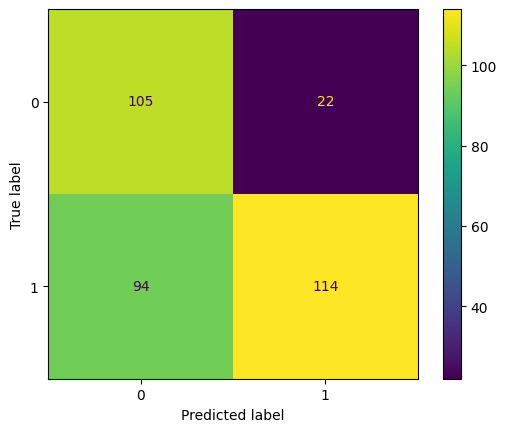

In [22]:
# Confusion Matrix
cm= confusion_matrix(y_test, y_pred, labels= nb.classes_)
disp= ConfusionMatrixDisplay(confusion_matrix= cm, display_labels= nb.classes_)
disp.plot()

**Recommendation to Stakeholders**

The model created provides some value in predicting an NBA player’s chances of playing for five years or more. Notably, the model performed better at predicting true positives than it did at predicting true negatives. In other words, it more accurately identified those players who will likely play for more than five years than it did those who likely will not.
